In [49]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_boston
import numpy as np 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

Dataf=pd.read_csv("/content/drive/MyDrive/critical-temperature-of-superconductors/train.csv")
Dataf=Dataf.drop(columns=["number_of_elements","range_Valence"])#Убираем target
x=Dataf.drop(columns=["critical_temp"])#Убираем не числа 
y=Dataf["critical_temp"]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
model = LinearRegression()
model.fit(X_train, y_train)
w0 = model.intercept_
w1 = model.coef_

In [ ]:
Dataf.head(20)

In [48]:
result=""
result+=str(w0)
names=list(Dataf.columns)
names.pop()
for i in range(len(w1)):
  result+=" +"+" "+str(w1[i])+"*"+str(names[i])
result
#множество элементов имеет прямо пропорциональную связь wtd_gmean_atomic_mass, wtd_entropy_fie(выброс)
#присутсвуют обратно пропорциональные элементы wtd_mean_fie, entropy_atomic_mass(выброс), wtd_entropy_atomic_mass

'-26.119577960545072 + 0.9508715342646535*mean_atomic_mass + -1.022039319479953*wtd_mean_atomic_mass + -0.6026647406152958*gmean_atomic_mass + 0.7445551879241759*wtd_gmean_atomic_mass + -32.03590746799054*entropy_atomic_mass + 2.5408951224049288*wtd_entropy_atomic_mass + 0.24364717278277837*range_atomic_mass + 0.03062718890105777*wtd_range_atomic_mass + -0.660275629196518*std_atomic_mass + 0.12526566298544237*wtd_std_atomic_mass + 0.1562872461017182*mean_fie + -0.24300798504278057*wtd_mean_fie + -0.1423757650825006*gmean_fie + 0.2581912896863934*wtd_gmean_fie + -154.44073087844038*entropy_fie + 45.970729161167014*wtd_entropy_fie + 0.06398864898687034*range_fie + 0.023476592143154867*wtd_range_fie + -0.18518929031806353*std_fie + -0.016706425550806592*wtd_std_fie + -0.6005351457826605*mean_atomic_radius + 3.467856731378829*wtd_mean_atomic_radius + 0.2676113116933467*gmean_atomic_radius + -3.063432718207087*wtd_gmean_atomic_radius + 93.05618813681801*entropy_atomic_radius + 44.7192183531

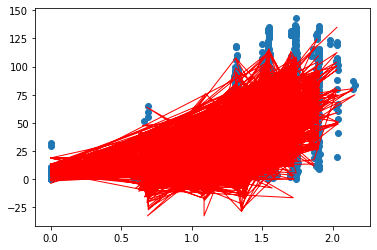

In [45]:
y_pred = model.predict(X_test)
plt.scatter(X_test["entropy_fie"], y_test)
plt.plot(X_test["entropy_fie"], y_pred, color='red', linewidth=1);
plt.show()

In [46]:
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))#MAE велик, поэтому высока вероятность ошибки
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))#MSE 312 значит один или более прогнозов сильно отличается (большое значение из-за возведения в квадрат)
print('R2 score:', r2_score(y_test, y_pred))#модель функионирует нормально, т.к. R2 находится в промежутке от 0 до 1

Mean Absolute Error: 13.4432537821411
Mean Squared Error: 314.25131254370797
R2 score: 0.7360461780543865
